In [0]:
import pandas as pd 
import numpy as np 
from time import sleep
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from random import randint
import requests
import sklearn
import folium
import os 
import json 

In [0]:
#GETTING THE JSON OF THE NY NEIGHBORHOODS. WITH THIS WE CAN FIND LATITUDE AND LONGITUDE 
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

ny_n = neighborhoods

In [3]:
#DF WITH THE INFORMATION THAT WAS ON JSON FILE 
ny_n.head()


Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [0]:
# THE ID OF THE PLACES THAT NEED TO BE CALLED FROM FOURSQUARE API 
jazz_club = '4bf58dd8d48988d1e7931735'
record_shop ='4bf58dd8d48988d10d951735'
recording_studio = '52f2ab2ebcbc57f1066b8b37'
music_store ='4bf58dd8d48988d1fe941735'
music_school = '4f04b10d2fb6e1c99f3db0be'

outdoor_sculpture = '52e81612bcbc57f1066b79ed'
street_art ='52e81612bcbc57f1066b79ee'
art_museum = '4bf58dd8d48988d18f941735'
art_gallery = '4bf58dd8d48988d1e2931735' 

bookstore ='4bf58dd8d48988d1b1941735'
library = '4bf58dd8d48988d12f941735'

park = '4bf58dd8d48988d163941735'
cafe = '4bf58dd8d48988d16d941735'

# to generate the category id as requested on Foursquare API  
list_categories = [jazz_club,record_shop,recording_studio,music_store,music_school,street_art,outdoor_sculpture,art_museum,art_gallery,bookstore,library,park,cafe]
list_categories = ','.join(list_categories)


In [0]:
#credentials for the API call
CLIENT_ID = 'BTT0PWIXI0LS4RZMCYUYKEYQSLHFLKPEVIXF0FFOLGGNTBDZ'
CLIENT_SECRET  ='IGCLRV5XOO1NKVVTQOIJ1CNKXOYY22NREX5LAJNZJLOQ4R4L'
VERSION = '20200427'
limit = 100
category_id = list_categories

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
       
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}.&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng,radius,limit,category_id)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [0]:
# calling the api function and store the results in a dataframe
ny_venues = getNearbyVenues(names=ny_n['Neighborhood'],latitudes=ny_n['Latitude'],longitudes=ny_n['Longitude'])


In [7]:
ny_venues

Neighborhood  Neighborhood Latitude  \
0                     Wakefield              40.894705   
1                    Co-op City              40.874294   
2                    Co-op City              40.874294   
3                    Co-op City              40.874294   
4                   Eastchester              40.887556   
5                   Eastchester              40.887556   
6                     Riverdale              40.890834   
7                     Riverdale              40.890834   
8                     Riverdale              40.890834   
9                     Riverdale              40.890834   
10                    Riverdale              40.890834   
11                  Kingsbridge              40.881687   
12                  Kingsbridge              40.881687   
13                  Kingsbridge              40.881687   
14                  Kingsbridge              40.881687   
15                  Kingsbridge              40.881687   
16                  Kingsbridge              40.881687   
17                  Kingsbridge              40.881687   
18                  Kingsbridge              40.881687   
19                  Kingsbridge              40.881687   
20                  Marble Hill              40.876551   
21                  Marble Hill              40.876551   
22                  Marble Hill              40.876551   
23                     Woodlawn              40.898273   
24                     Woodlawn              40.898273   
25                     Woodlawn              40.898273   
26                     Woodlawn              40.898273   
27                     Woodlawn              40.898273   
28                     Woodlawn              40.898273   
29                      Norwood              40.877224   
30                      Norwood              40.877224   
31                      Norwood              40.877224   
32                      Norwood              40.877224   
33                      Norwood              40.877224   
34                      Norwood              40.877224   
35                      Norwood              40.877224   
36                      Norwood              40.877224   
37                      Norwood              40.877224   
38                      Norwood              40.877224   
39                      Norwood              40.877224   
40                      Norwood              40.877224   
41                      Norwood              40.877224   
42               Williamsbridge              40.881039   
43               Williamsbridge              40.881039   
44                   Baychester              40.866858   
45               Pelham Parkway              40.857413   
46               Pelham Parkway              40.857413   
47               Pelham Parkway              40.857413   
48                  City Island              40.847247   
49                  City Island              40.847247   
50                  City Island              40.847247   
51                  City Island              40.847247   
52                  City Island              40.847247   
53                 Bedford Park              40.870185   
54                 Bedford Park              40.870185   
55                 Bedford Park              40.870185   
56                 Bedford Park              40.870185   
57           University Heights              40.855727   
58           University Heights              40.855727   
59           University Heights              40.855727   
60           University Heights              40.855727   
61           University Heights              40.855727   
62               Morris Heights              40.847898   
63               Morris Heights              40.847898   
64               Morris Heights              40.847898   
65               Morris Heights              40.847898   
66                      Fordham              40.860997   
67                      Fordham              40.860997   
68               

In [0]:
#save the content on a csv to be safer 
ny_venues.to_csv('/content/drive/My Drive/Colab Notebooks/Coursera/ jazz.csv')

In [0]:
#open the previously saved csv
ny_venues = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Coursera/ jazz.csv')

In [0]:
#TRANSFORM THE CATEGORIES TO COLUMNS 

# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = ny_venues['Neighborhood'] 

# # move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()


In [0]:
#filtering the data just with the categories that we want
cat = ['Neighborhood','Jazz Club', 'Record Shop','Recording Studio', 'Music Store','Music School','Outdoor Sculpture','Art Museum', 'Art Gallery','Bookstore','Library','Park','Café']

ny_grouped = ny_grouped[cat]

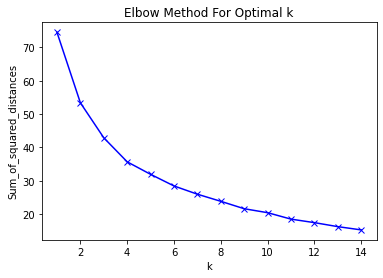

In [12]:
#plotting the distances for k's to find the certain number to divide the cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

grouped_clustering =  ny_grouped.drop('Neighborhood', 1)
Sum_of_squared_distances = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
#THIS CLUSTER IS TO DIVIDE DE NEIGHBORHOODS OF NY IN CATEGORIES. THE INTENTION IS TO SEE IF ALL THE JAZZ CLUBS IS IN SOME NEIGHBORHOOD CATEGORY 
# set number of clusters
kclusters = 5

ny_grouped_clustering = ny_grouped.drop('Neighborhood', 1)


# # run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ny_grouped_clustering)


# # check cluster labels generated for each row in the dataframe
label = kmeans.labels_

In [0]:
#Inserting the labels generated by the cluster
ny_grouped['label'] = label
#Merge with the first dataframe to get the specific location from the neighborhoods 
ny_final = pd.merge(ny_n,ny_grouped)

In [15]:
#Filtering only jazz places 
jazz_df = ny_venues[ny_venues['Venue Category'] == 'Jazz Club'].reset_index(drop=True)
jazz_df

Unnamed: 0               Neighborhood  Neighborhood Latitude  \
0          133               Country Club              40.844246   
1          265          Manhattan Terrace              40.614433   
2          575  Prospect Lefferts Gardens              40.658420   
3          679                 North Side              40.714823   
4          696                 South Side              40.710861   
5          703                 South Side              40.710861   
6          910             Central Harlem              40.815976   
7          940            Upper East Side              40.775639   
8         1005                  Yorkville              40.775930   
9         1298                Murray Hill              40.748303   
10        1439          Greenwich Village              40.726933   
11        1440          Greenwich Village              40.726933   
12        1452          Greenwich Village              40.726933   
13        1536               East Village              40.727847   
14        1863               West Village              40.734434   
15        1865               West Village              40.734434   
16        1866               West Village              40.734434   
17        1871               West Village              40.734434   
18        1875               West Village              40.734434   
19        1878               West Village              40.734434   
20        2763               Civic Center              40.715229   
21        2782              Midtown South              40.748510   
22        2934               Sutton Place              40.760280   

    Neighborhood Longitude                        Venue  Venue Latitude  \
0               -73.824099                         jazz       40.843457   
1               -73.957438                   Jazz. Club       40.615307   
2               -73.954899                 Inkwell Cafe       40.662776   
3               -73.958809                   Hoi Polloi       40.717966   
4               -73.958001                     WMC Jazz       40.711278   
5               -73.958001    Williamsburg Music Center       40.711145   
6               -73.943211                 Bill's Place       40.813366   
7               -73.960508                 Café Carlyle       40.774466   
8               -73.947118                  Wave Studio       40.779666   
9               -73.978332  The Jazz Room at The Kitano       40.749731   
10              -73.999914                    Blue Note       40.730833   
11              -73.999914                 Special Club       40.727704   
12              -73.999914                Bar Next Door       40.730655   
13              -73.982226                        Rue B       40.727891   
14              -74.006180             Smalls Jazz Club       40.734358   
15              -74.006180             Village Vanguard       40.735953   
16              -74.006180                      Fat Cat       40.733665   
17              -74.006180                      Mezzrow       40.734470   
18              -74.006180              Arthur's Tavern       40.733104   
19              -74.006180                       55 Bar       40.733779   
20              -74.005415                  The 75 Club       40.714820   
21              -73.988713                 Jazz Gallery       40.744666   
22              -73.963556           Tutuma Social Club       40.759716   

    Venue Longitude Venue Category  
0        -73.820357      Jazz Club  
1        -73.954750      Jazz Club  
2        -73.953789      Jazz Club  
3        -73.961712      Jazz Club  
4        -73.963099      Jazz Club  
5        -73.963120      Jazz Club  
6        -73.943701      Jazz Club  
7        -73.963369      Jazz Club  
8        -73.946987      Jazz Club  
9        -73.979990      Jazz Club  
10       -74.000808      Jazz Club  
11       -74.002588      Jazz Club  
12       -74.000053      Jazz Club  
13       -73.979178      Jazz Club  
14       -74.00

In [16]:
# MAP TO VISUALIZE THE CLUSTER AND THE JAZZ VENUE PLACES 

import matplotlib.cm as cm
import matplotlib.colors as colors
latitude = latitude = 40.7128
longitude =  - 74.0060
final_map = folium.Map(location=[latitude, longitude], zoom_start=10)

overlay = os.path.join('data','/content/drive/My Drive/Colab Notebooks/Coursera/Neighborhood Tabulation Areas (NTA).geojson')
folium.GeoJson(overlay).add_to(final_map)


colors_array = cm.rainbow(np.linspace(0, 1, 5))
rainbow = [colors.rgb2hex(i) for i in colors_array]
for r in range(len(ny_final)):
  lat = ny_final['Latitude'][r]
  lng = ny_final['Longitude'][r]
  color = ny_final['label'][r]
  freq = ny_final.loc[r]
  popup = ("{}".format(freq))

  

  folium.CircleMarker([lat,lng],radius=5,fill_opacity=0.7,
                      fill=True,color=rainbow[color-1],popup=popup).add_to(final_map)
for jc in range(len(jazz_df)):
  lat = jazz_df['Venue Latitude'][jc]
  lng= jazz_df['Venue Longitude'][jc]

  folium.Marker([lat,lng]).add_to(final_map)

final_map



In [17]:
#IDENTIFYING WICH NEIGHBORHOODS HAS MORE DIFFERENT CATEGORIES VENUES 
aux_list = []

for x in range(len(ny_grouped)):
  neighborhood = ny_grouped['Neighborhood'][x]
  aux_df = (ny_grouped.loc[x]).reset_index()
  aux_df.columns = aux_df.iloc[0]
  aux_df = aux_df[2:-1].reset_index()
  num_places = len(aux_df[aux_df[neighborhood] > 0].reset_index())
  

  df_to_transform = pd.DataFrame({'Neighborhood':neighborhood,'places':num_places},index=[0])
  aux_list.append(df_to_transform)

places = pd.concat(aux_list,ignore_index=True,axis=0)
places = places.sort_values('places',ascending=False).reset_index(drop=True)

print('Neighborhoods with more unique category venues:')
places.head(10)


Neighborhoods with more unique category venues:


Neighborhood  places
0                Noho      10
1                Soho       9
2             Clinton       9
3  Financial District       9
4        Little Italy       9
5   Greenwich Village       9
6             Midtown       9
7               Dumbo       8
8          South Side       8
9        Civic Center       8

In [18]:
jazz_count_df = jazz_df.groupby('Neighborhood')['Neighborhood'].count()
jazz_count_df = jazz_count_df.sort_values(ascending=False)

print('Neighborhoods with more jazz clubs:')
jazz_count_df

Neighborhoods with more jazz clubs:


Neighborhood
West Village                 6
Greenwich Village            3
South Side                   2
Yorkville                    1
Upper East Side              1
Sutton Place                 1
Prospect Lefferts Gardens    1
North Side                   1
Murray Hill                  1
Midtown South                1
Manhattan Terrace            1
East Village                 1
Country Club                 1
Civic Center                 1
Central Harlem               1
Name: Neighborhood, dtype: int64

In [19]:
# getting the latitude and longitude of the neighborhoods with more unique category venues
ny_filter = ny_n[(ny_n['Neighborhood'] == 'Noho') | (ny_n['Neighborhood']=='Soho')
| (ny_n['Neighborhood']=='Flatiron')| (ny_n['Neighborhood']=='Little Italy')| (ny_n['Neighborhood']=='West Village')
| (ny_n['Neighborhood']=='Financial District')].reset_index(drop=True)

ny_filter


Borough        Neighborhood   Latitude  Longitude
0  Manhattan        Little Italy  40.719324 -73.997305
1  Manhattan                Soho  40.722184 -74.000657
2  Manhattan        West Village  40.734434 -74.006180
3  Manhattan  Financial District  40.707107 -74.010665
4  Manhattan                Noho  40.723259 -73.988434
5  Manhattan            Flatiron  40.739673 -73.990947

In [20]:
latitude = latitude = 40.7128
longitude =  - 74.0060
check_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for i in range(len(ny_filter)):
  lat = ny_filter['Latitude'][i]
  lng = ny_filter['Longitude'][i]
  popup= ny_filter['Neighborhood'][i]

  folium.CircleMarker([lat,lng],popup=popup,tooltip=popup).add_to(check_map)

for jc in range(len(jazz_df)):
  lat = jazz_df['Venue Latitude'][jc]
  lng= jazz_df['Venue Longitude'][jc]
  tooltip=jazz_df['Venue'][jc]
 

  folium.Marker([lat,lng],tooltip=tooltip).add_to(check_map)

check_map

In [0]:
distances = []
for i in range(len(ny_filter)):
  nei = ny_filter['Neighborhood'][i]
  lat1= ny_filter['Latitude'][i]
  lng1 = ny_filter['Longitude'][i]
  nei_name = ny_filter['Neighborhood'][i]

  list_distances=[]

  nei = [[lat1,lng1]]
  for coor in range(len(jazz_df)):
    lat = jazz_df['Venue Latitude'][coor]
    lng = jazz_df['Venue Longitude'][coor]
    name =jazz_df['Venue'][coor]

    name=[[lat,lng]]
    distance = (sklearn.metrics.pairwise.paired_euclidean_distances(nei,name)[0])
    name=jazz_df['Venue'][coor]
    df = pd.DataFrame({'name':name,'distance':distance},index=[0])
    list_distances.append(df)

  
  shorter_df = (pd.concat(list_distances,ignore_index=True,axis=0).sort_values('distance').reset_index(drop=True).head(1))
  shortest = (shorter_df['distance'])
  distances.append(pd.DataFrame({'Name':nei_name,'Distance':shortest},index=[0]))

distance_df = pd.concat(distances,axis=0,ignore_index=True).sort_values('Distance',ascending=False).reset_index(drop=True)

In [22]:
distance_df

Name  Distance
0                Noho  0.010350
1        Little Italy  0.009907
2  Financial District  0.007714
3                Soho  0.005848
4            Flatiron  0.005453
5        West Village  0.003154

NOHO ITS THE BEST LOCATION FOR A NEW JAZZ CLUB